In [1]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  

</style>

In [2]:
import datetime
import pyaurorax
import matplotlib.pyplot as plt
import numpy as np

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools

In [3]:
# First, download and read a TREx RGB image
site_uid = "gill"
dataset_name = "TREX_RGB_RAW_NOMINAL"
start_dt = datetime.datetime(2023, 2, 24, 6, 15)
end_dt = start_dt
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)
rgb_data = aurorax.data.ucalgary.read(r.dataset, r.filenames)

In [4]:
# Grab the corresponding skymap
dataset_name = "TREX_RGB_SKYMAP_IDLSAV"
r = aurorax.data.ucalgary.download_best_skymap(dataset_name, site_uid, start_dt)
skymap_data = aurorax.data.ucalgary.read(r.dataset, r.filenames)

rgb_images = at.scale_intensity(rgb_data.data, min=15, max=110)
rgb_skymap = skymap_data.data[0]

### **Add Lines of Constant Elevation and Azimuth**

In [5]:
# Obtain pixel coordinates of the line of 40 degrees elevation
elev_x, elev_y = at.ccd_contour.elevation(rgb_skymap, 40)

# Obtain pixel coordinates of the line of 45 degrees azimuth
azim_x, azim_y = at.ccd_contour.azimuth(rgb_skymap, 45)

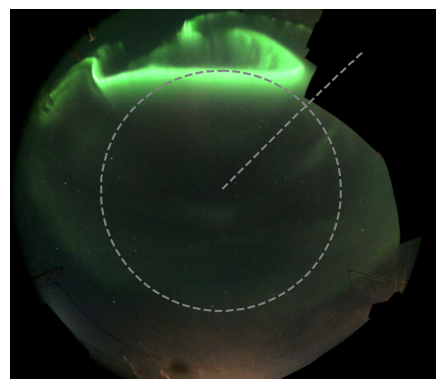

In [6]:
# Plot the image
plt.imshow(rgb_images[:,:,:,0], origin="lower", cmap='gray')
plt.axis("off")

# Oveplot the line of constant elevation and azimuth
plt.plot(elev_x, elev_y, color='gray', linestyle='--')
plt.plot(azim_x, azim_y, color='gray', linestyle='--')
plt.show()

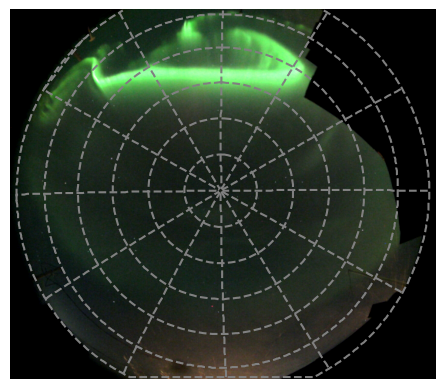

In [7]:
# Create empty lists to hold a number of arrays defining contours
ccd_x = []
ccd_y = []

# Obtain pixel coords for a number of constant elevations
for elevation in range(0,90,15):
    elev_x, elev_y = at.ccd_contour.elevation(rgb_skymap, elevation)
    # add to lists of all ccd coord arrays
    ccd_x.append(elev_x)
    ccd_y.append(elev_y)

# Obtain pixel coords for a number of constant azimuths
for azimuth in range(0,360,30):
    azim_x, azim_y = at.ccd_contour.azimuth(rgb_skymap, azimuth, min_elevation=0)
    # add to lists of all ccd coord arrays
    ccd_x.append(azim_x)
    ccd_y.append(azim_y)

# Plot image
plt.imshow(rgb_images[:,:,:,0], origin="lower", cmap='gray')
plt.axis("off")

# Iterate through lists and plot all sets of ccd coords
for i in range(len(ccd_x)):
    plt.plot(ccd_x[i], ccd_y[i], color='gray', linestyle='--')

### **Add Custom Geographic & Geomagnetic Contours**

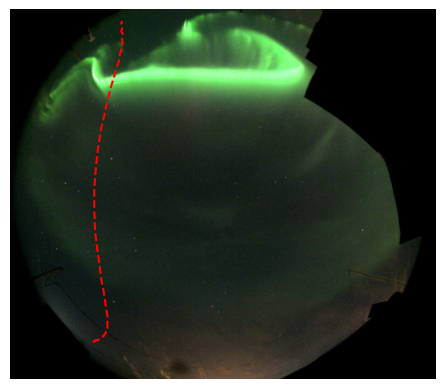

In [8]:
# Custom geographic contour

altitude_km = 115

# Define some set of geographic lat/lons defining a contour
latitudes = np.linspace(51.0, 62.0, 50)
longitudes = -102.0 + 5 * np.sin(np.pi * (latitudes - 51.0) / (62.0 - 51.0))

# Obtain the contour in CCD coordinates
ccd_x, ccd_y = at.ccd_contour.geo(rgb_skymap, altitude_km, contour_lats=latitudes, contour_lons=longitudes)

# Plot the image
plt.imshow(rgb_images[:,:,:,0], cmap='gray', origin='lower')
plt.axis("off")

# Plot the contour 
plt.plot(ccd_x, ccd_y, color='red', linestyle='--')
plt.show()

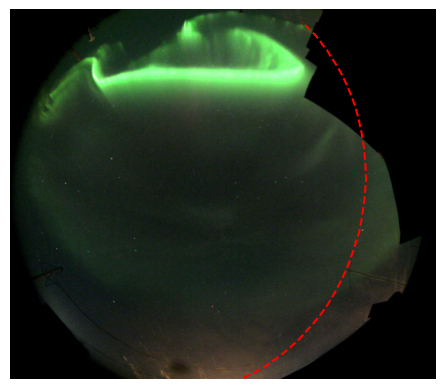

In [9]:
# Custom geomagnetic contour

altitude_km = 115
timestamp = rgb_data.timestamp[0]

# Define some set of magnetic lat/lons defining a contour
latitudes = np.linspace(59.0, 69.0, 50)
longitudes = -30.0 + (np.sin(np.linspace(0, np.pi/2, 50)) + 1) * (11/2)

# Obtain the geomagnetic contour in CCD coordinates
ccd_x, ccd_y = at.ccd_contour.mag(rgb_skymap, timestamp, altitude_km, contour_lats=latitudes, contour_lons=longitudes)

# Plot the image
plt.imshow(rgb_images[:,:,:,0], cmap='gray', origin='lower')
plt.axis("off")

# Plot the contour 
plt.plot(ccd_x, ccd_y, color='red', linestyle='--')
plt.show()

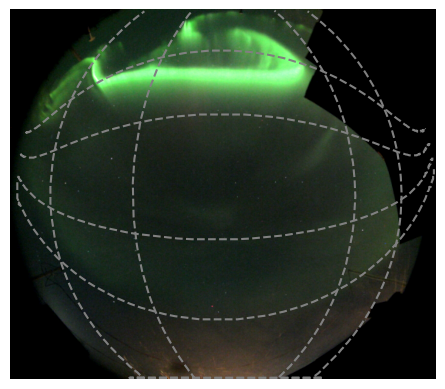

In [10]:
# Lines of constant geographic lat/lon

altitude_km = 115

# Create empty lists to hold a number of arrays defining contours
ccd_x = []
ccd_y = []

# Create a couple different lines of constant latitude
for lat in np.arange(55,59,1):
    x_pix, y_pix = at.ccd_contour.geo(rgb_skymap, altitude_km=altitude_km, constant_lat=lat)
    ccd_x.append(x_pix)
    ccd_y.append(y_pix)

# Create a couple different lines of constant longitude
for i in np.arange(-100, -84, 4):
    x_pix, y_pix = at.ccd_contour.geo(rgb_skymap, altitude_km=altitude_km, constant_lon=i)
    ccd_x.append(x_pix)
    ccd_y.append(y_pix)

# Plot the image
plt.imshow(rgb_images[:,:,:,0], cmap='gray', origin='lower')
plt.axis("off")

# Iteratively plot all lines on top
for i in range(len(ccd_x)):
    plt.plot(ccd_x[i], ccd_y[i], color='gray', linestyle='--')